In [31]:
!pip install fbprophet

     |████████████████████████████████| 51kB 4.0MB/s eta 0:00:011
     |████████████████████████████████| 39.1MB 24.8MB/s eta 0:00:01     |█████████████▏                  | 16.1MB 15.4MB/s eta 0:00:02
     |████████████████████████████████| 81kB 19.2MB/s eta 0:00:01
     |████████████████████████████████| 737kB 26.4MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/Sarah/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/6z/14phq21533g590w02s8s4k3w0000gn/T/pip-install-3jvvg1f9/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/6z/14phq21533g590w02s8s4k3w0000gn/T/pip-install-3jvvg1f9/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/6z/14phq21533g590w02s8s4k3w0000gn/T/pip-wheel-t8gm0cmk --python-tag cp37
       cwd: /priva

In [40]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [29]:
data = pd.read_csv("Downloads/NFLX.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-02,52.125713,52.565716,51.372856,51.988571,51.988571,11675300
1,2013-12-03,51.698570,51.939999,50.928570,51.848572,51.848572,13400800
2,2013-12-04,51.512856,52.664288,50.892857,50.895714,50.895714,19395600
3,2013-12-05,51.114285,51.590000,50.484287,51.151428,51.151428,13793500
4,2013-12-06,51.577145,51.618572,50.285713,50.634285,50.634285,12075700


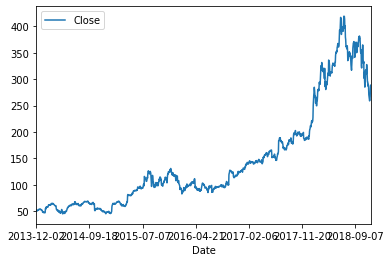

In [67]:
#Closing Price Plot
data.plot(x="Date", y="Close")


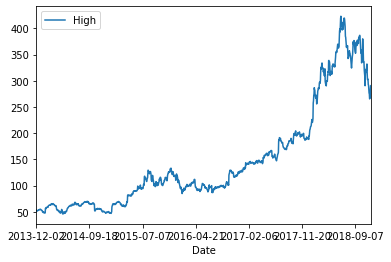

In [68]:
#Highest Price Plot by Date
data.plot(x="Date", y="High")

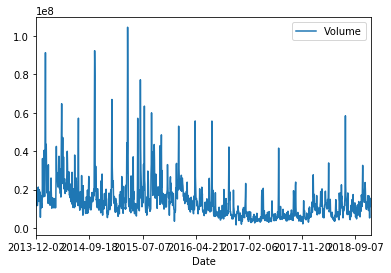

In [69]:
#Volume Plot by DATE
data.plot(x="Date",y="Volume")

In [87]:
data.rename(columns={'Close':'y','Date':'ds'},inplace=True)
data['ds']=pd.to_datetime(data['ds'])
data['y']=data['y'].astype(float)

data.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2013-12-02,52.125713,52.565716,51.372856,51.988571,51.988571,11675300
1,2013-12-03,51.698570,51.939999,50.928570,51.848572,51.848572,13400800
2,2013-12-04,51.512856,52.664288,50.892857,50.895714,50.895714,19395600
3,2013-12-05,51.114285,51.590000,50.484287,51.151428,51.151428,13793500
4,2013-12-06,51.577145,51.618572,50.285713,50.634285,50.634285,12075700


In [90]:
data_prophet=Prophet(changepoint_prior_scale=0.15,daily_seasonality=True)
data_prophet.fit(data)

In [97]:
fcast_time=365
data_forecast = data_prophet.make_future_dataframe(periods=fcast_time,freq='D')
data_forecast.tail(365)

,ds
1260,2018-12-01
1261,2018-12-02
1262,2018-12-03
1263,2018-12-04
1264,2018-12-05
...,...
1620,2019-11-26
1621,2019-11-27
1622,2019-11-28
1623,2019-11-29


In [100]:
data_forecast = data_prophet.predict(data_forecast)
data_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1620,2019-11-26,417.882030,65.102280,776.324954
1621,2019-11-27,417.844737,62.634811,772.351045
1622,2019-11-28,417.942100,60.775196,782.493453
1623,2019-11-29,417.886595,66.337419,773.888924
1624,2019-11-30,408.773063,53.334174,776.794839


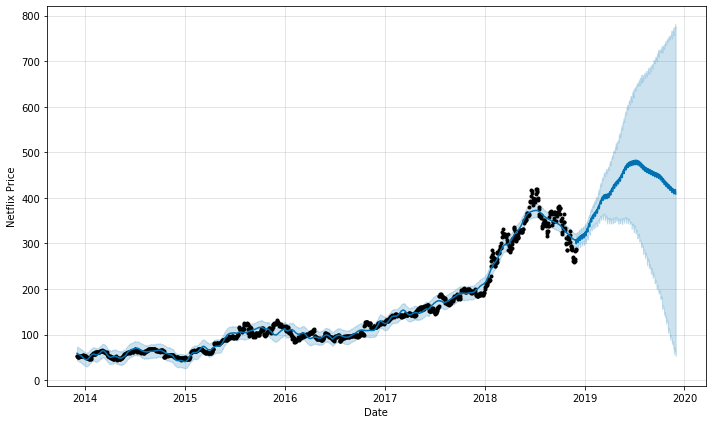

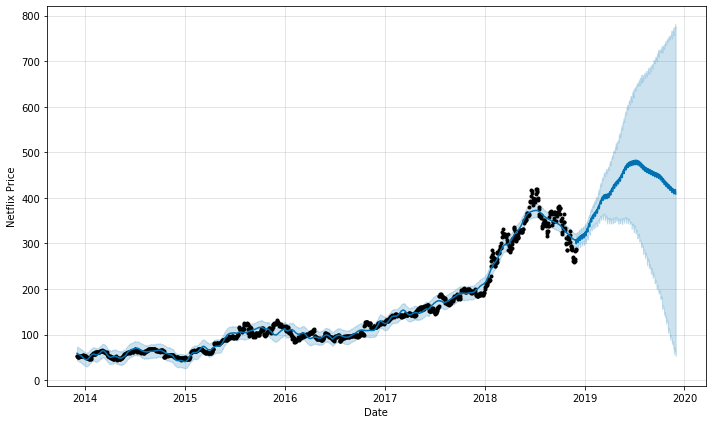

In [102]:
data_prophet.plot(data_forecast,xlabel='Date',ylabel='Netflix Price')